<a href="https://colab.research.google.com/github/alenadpeethala1/resumeanalysisproject/blob/main/Alena's_Resume_Analysis_Project_(Summer_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

alena's final project
monday, july 1, 2024
10 am
:)

The goal of this project is to develop a tool that essentially analyzes resumes and assesses their suitability for a certain field. For now, I have installed some packages and libraries, imported a resume dataset from Kaggle, and am now playing around with TF-IDF and Word Clouds for Keyword Extraction and building word clouds!

In [ ]:
!pip install pandas nltk wordcloud matplotlib
!pip install kaggle
# installing pandas, nltk, wordcloud matplotlib, etc.

In [ ]:
%autosave 60

Autosaving every 60 seconds


In [ ]:
!kaggle datasets download -d snehaanbhawal/resume-dataset
# downloading the dataset from kaggle

Dataset URL: https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset
License(s): CC0-1.0
 88% 55.0M/62.5M [00:01<00:00, 39.8MB/s]
100% 62.5M/62.5M [00:01<00:00, 33.7MB/s]


In [ ]:
!unzip resume-dataset.zip
#unzipping/extracting b/c the compressed file cannot be read by pandas

Archive:  resume-dataset.zip
  inflating: Resume/Resume.csv       
  inflating: data/data/ACCOUNTANT/10554236.pdf  
  inflating: data/data/ACCOUNTANT/10674770.pdf  
  inflating: data/data/ACCOUNTANT/11163645.pdf  
  inflating: data/data/ACCOUNTANT/11759079.pdf  
  inflating: data/data/ACCOUNTANT/12065211.pdf  
  inflating: data/data/ACCOUNTANT/12202337.pdf  
  inflating: data/data/ACCOUNTANT/12338274.pdf  
  inflating: data/data/ACCOUNTANT/12442909.pdf  
  inflating: data/data/ACCOUNTANT/12780508.pdf  
  inflating: data/data/ACCOUNTANT/12802330.pdf  
  inflating: data/data/ACCOUNTANT/13072019.pdf  
  inflating: data/data/ACCOUNTANT/13130984.pdf  
  inflating: data/data/ACCOUNTANT/13294301.pdf  
  inflating: data/data/ACCOUNTANT/13491889.pdf  
  inflating: data/data/ACCOUNTANT/13701259.pdf  
  inflating: data/data/ACCOUNTANT/14055988.pdf  
  inflating: data/data/ACCOUNTANT/14126433.pdf  
  inflating: data/data/ACCOUNTANT/14224370.pdf  
  inflating: data/data/ACCOUNTANT/14449423.pdf  
  

In [ ]:
!ls
# names of files and datasets

data  drive  Resume  resume-dataset.zip  sample_data


In [ ]:
!unzip resume-dataset.zip -d resume_dataset
# unzipping

Archive:  resume-dataset.zip
  inflating: resume_dataset/Resume/Resume.csv  
  inflating: resume_dataset/data/data/ACCOUNTANT/10554236.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/10674770.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/11163645.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/11759079.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12065211.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12202337.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12338274.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12442909.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12780508.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12802330.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/13072019.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/13130984.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/13294301.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/13491889.pdf  
  inflating: resume_dataset

In [ ]:
import os
os.listdir('.')
# had some trouble with naming which was messing up other parts of my code so i did it here

['.config',
 'drive',
 'data',
 'resume_dataset',
 'resume-dataset.zip',
 'Resume',
 'sample_data']

In [ ]:
import pandas as pd

# loading the CSV file into a DataFrame
# Resume.csv file is inside Resume directory
df = pd.read_csv('Resume/Resume.csv')

# displaying the first few rows of the dataframe just to get a sense of what it is like
df.head(45)


ID                                         Resume_str  \
0   16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1   22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2   33176873           HR DIRECTOR       Summary      Over 2...   
3   27018550           HR SPECIALIST       Summary    Dedica...   
4   17812897           HR MANAGER         Skill Highlights  ...   
5   11592605           HR GENERALIST       Summary     Dedic...   
6   25824789           HR MANAGER       Summary    HUMAN RES...   
7   15375009           HR MANAGER         Professional Summa...   
8   11847784           HR SPECIALIST       Summary    Posses...   
9   32896934           HR CLERK       Summary    Translates ...   
10  29149998           HR ASSISTANT       Summary    Highly ...   
11  11480899           HR MANAGER         Summary      Human...   
12  23155093           HR MANAGER         Summary    To obta...   
13  11763983           HR GENERALIST       Summary     A peo...   
14  27490876           HR COORDINATOR         Summary    App...   
15  32977530           HR CLERK       Summary     I am an et...   
16  93002334           HR ANALYST         Summary     Experi...   
17  24184357           HR DIRECTOR           Summary    Huma...   
18  73077810           HR GENERALIST/RECRUITER           Sum...   
19  13879043           HR CONSULTING       Summary    7+ yea...   
20  30163002           HR GENERALIST           Summary    Yo...   
21  18827609             HR ASSOCIATE         Professional S...   
22  25676643           HR SPECIALIST       Summary    An Hum...   
23  12786012           HR COORDINATOR       Summary     Cert...   
24  87968870           HR GENERALIST         Summary    Ener...   
25  46258701           HR COORDINATOR       Professional Sum...   
26  14225422           HR MANAGER/GENERALIST       Summary  ...   
27  29297973           HR REPRESENTATIVE       Summary    Ex...   
28  18334783           HR DIRECTOR/ADMINISTRATOR           E...   
29  19717385           HR INTERN       Summary    An enthusi...   
30  49937469           HR ASSISTANT             Highlights  ...   
31  18316239           HR GENERALIST       Professional Prof...   
32  17855844           HR MANAGER       Executive Profile   ...   
33  57667857           HR CONSULTANT       Summary     Detai...   
34  17422560           HR COORDINATOR           Summary    T...   
35  32947778           HR MANAGER         Summary     Human ...   
36  23914451           HR GENERALIST           Summary     H...   
37  21265194           HR PARTNER           Summary     Expe...   
38  51769822           HR SPECIALIST           Summary     E...   
39  19616406           HR DIRECTOR           Professional Su...   
40  41523474           HR EXECUTIVE       Summary     Dual s...   
41  59962788           HR EXECUTIVE       Professional Summa...   
42  86184722           HR GENERALIST         Skills        M...   
43  28419173           HR ASSISTANT       Professional Profi...   
44  18155310           HR COORDINATOR       Summary    Highl...   

                                          Resume_html Category  
0   <div class="fontsize fontface vmargins hmargin...       HR  
1   <div class="fontsize fontface vmargins hmargin...       HR  
2   <div class="fontsize fontface vmargins hmargin...       HR  
3   <div class="fontsize fontface vmargins hmargin...       HR  
4   <div class="fontsize fontface vmargins hmargin...       HR  
5   <div class="fontsize fontface vmargins hmargin...       HR  
6   <div class="fontsize fontface vmargins hmargin...       HR  
7   <div class="fontsize fontface vmargins hmargin...       HR  
8   <div class="fontsize fontface vmargins hmargin...       HR  
9   <div class="fontsize fontface vmargins hmargin...       HR  
10  <div class="fontsize fontface vmargins hmargin...       HR  
11  <div class="fontsize fontface vmargins hmargin...       HR  
12  <div class="fontsize fontface vmargins hmargin...       HR  
13  <div class="f

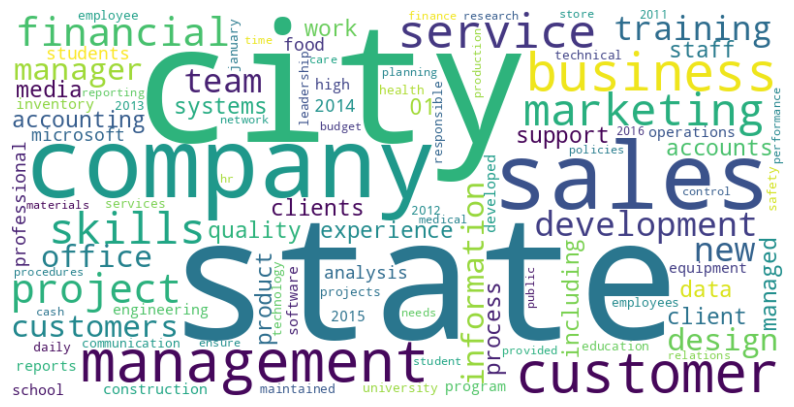

In [ ]:
# playing around with tf-idf for keyword extraction using syntax code
# helpful link for word clouds: https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 'Resume_str' is the column containing the resume text as strings
resume_text = df['Resume_str']

# initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# fitting and transforming the 'Resume_str' column
X_tfidf = tfidf_vectorizer.fit_transform(resume_text)

# extracting feature names (words) from the resume using TF_IDF method
feature_names = tfidf_vectorizer.get_feature_names_out()

# printing some example feature names
#print("Example feature names:", feature_names[:10])

# Generating the word ckoud based on TF-IDF weights
wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(dict(zip(feature_names, X_tfidf.sum(axis=0).A1)))
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
# X = vectorizer.fit_transform(df['Resume_str'])

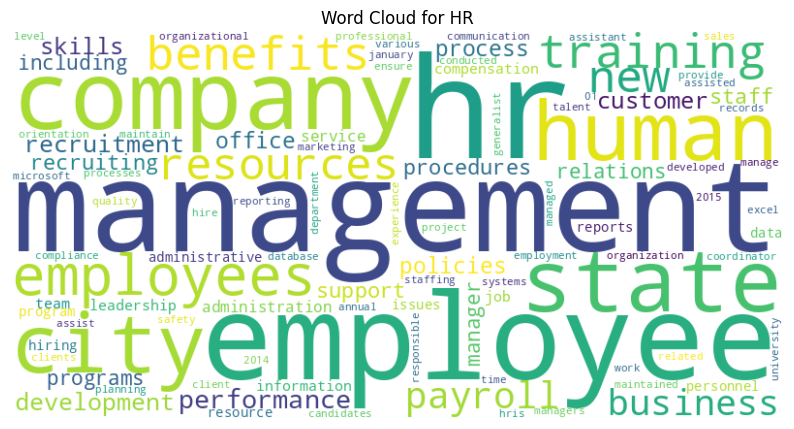

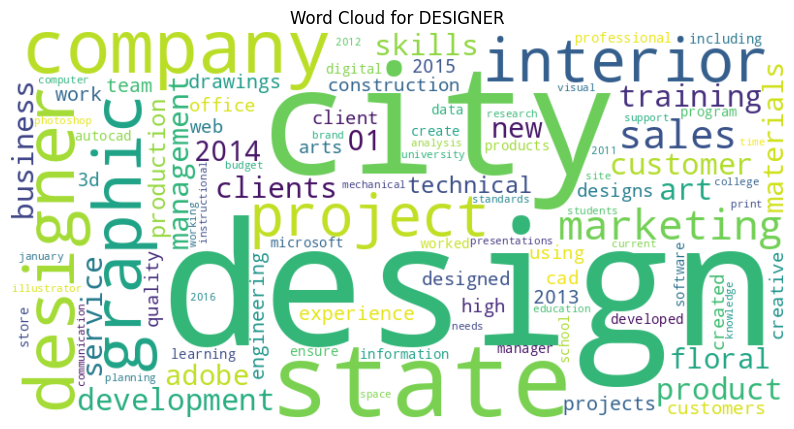

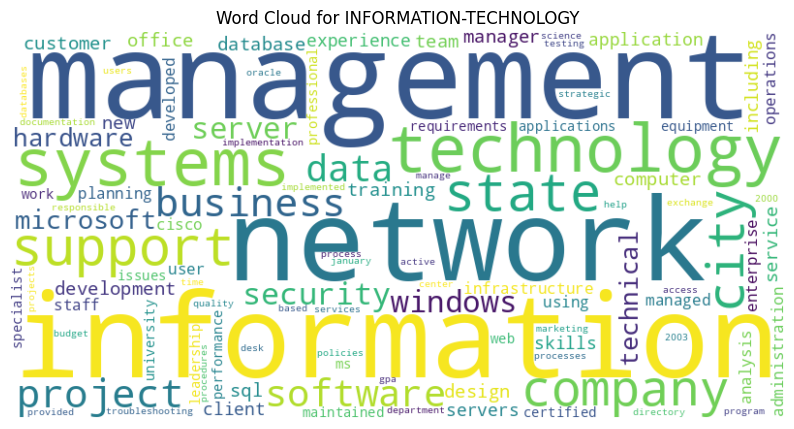

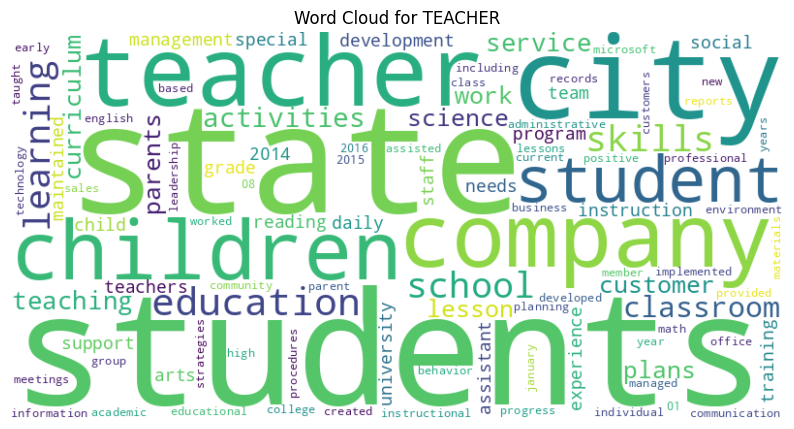

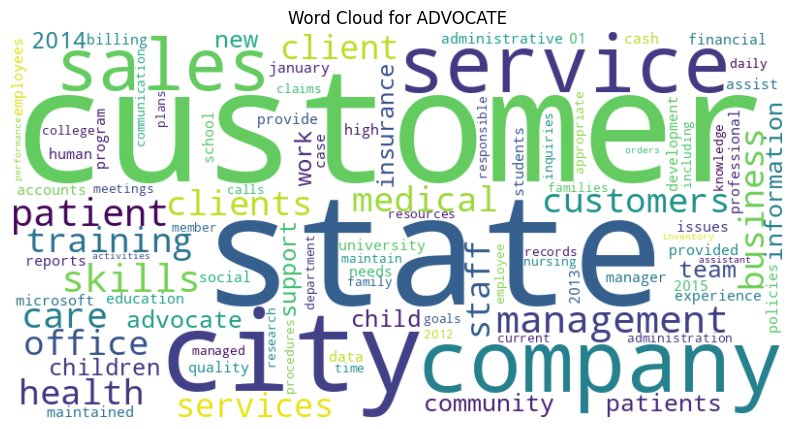

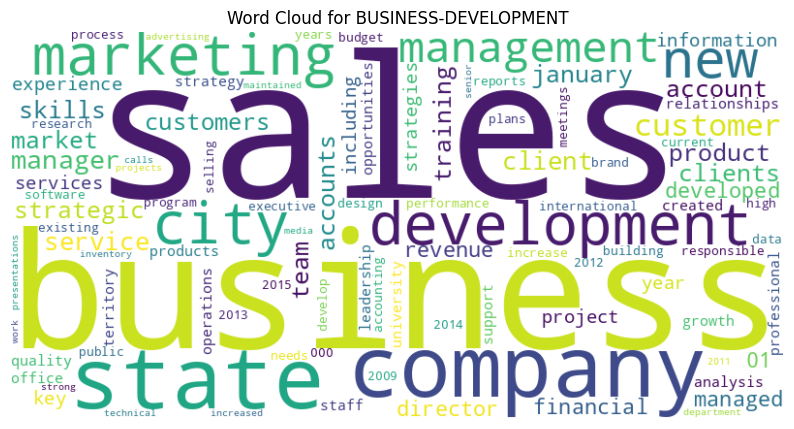

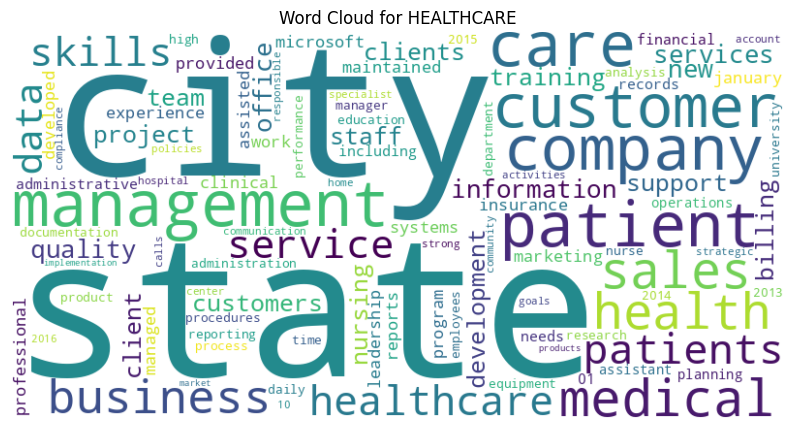

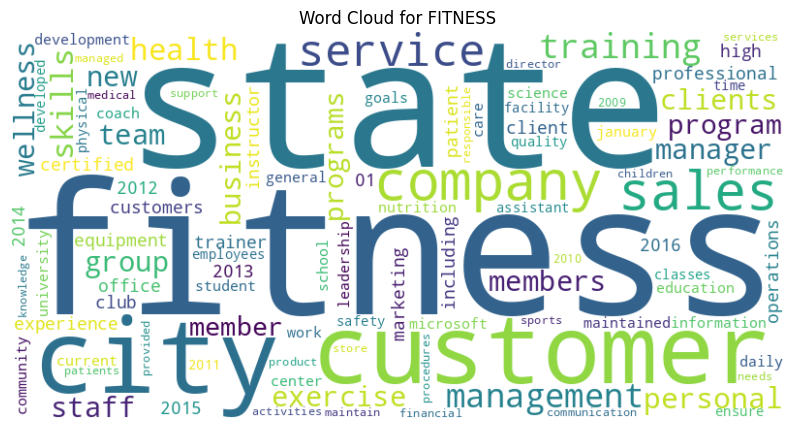

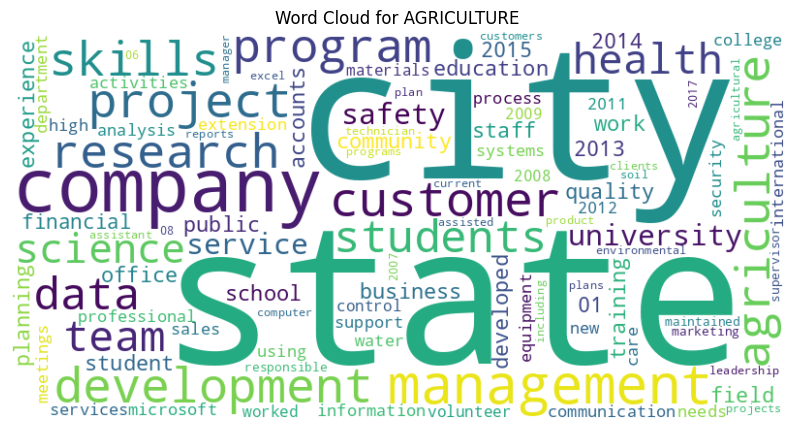

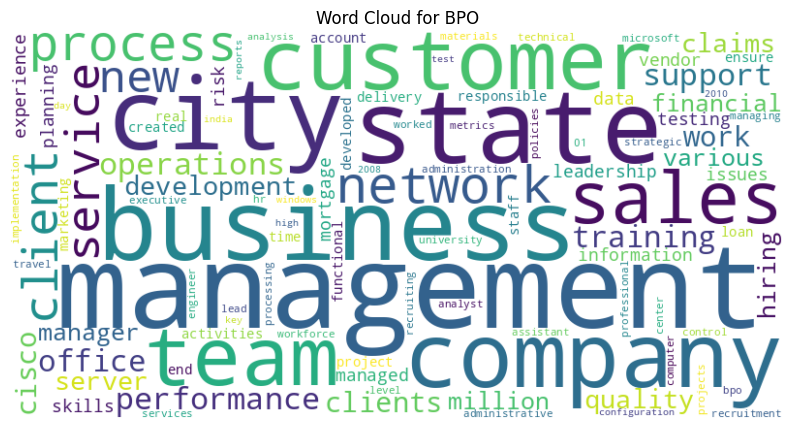

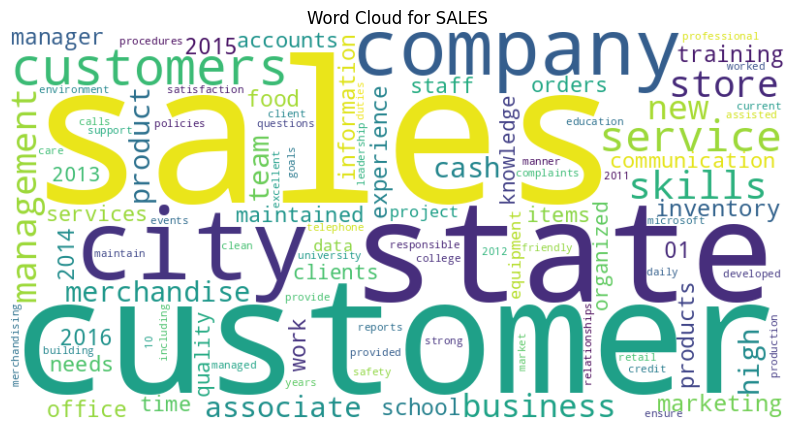

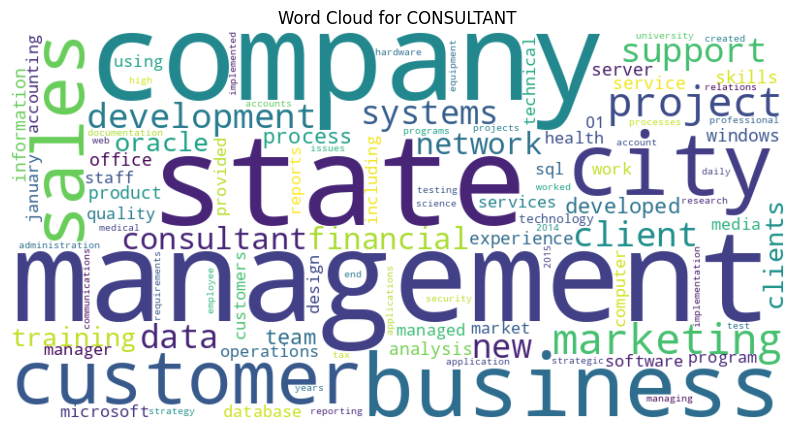

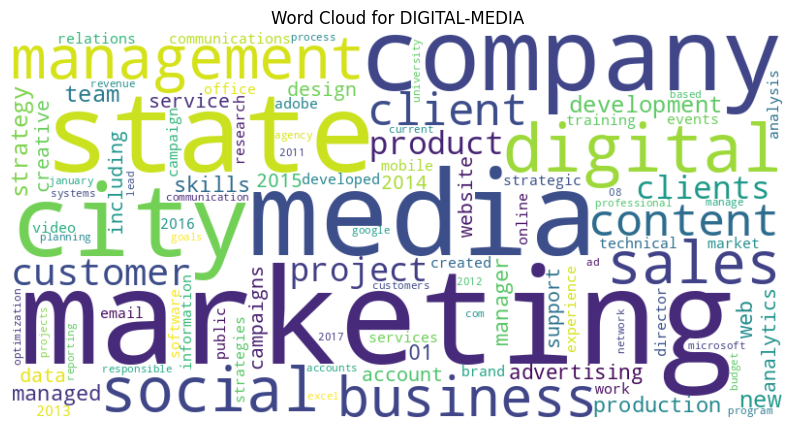

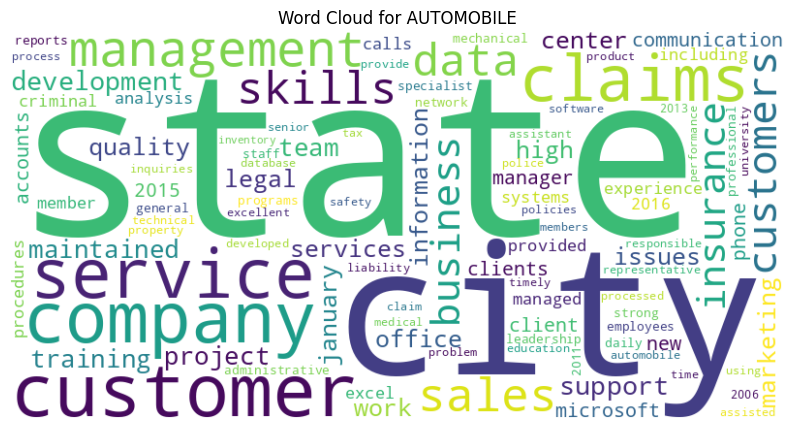

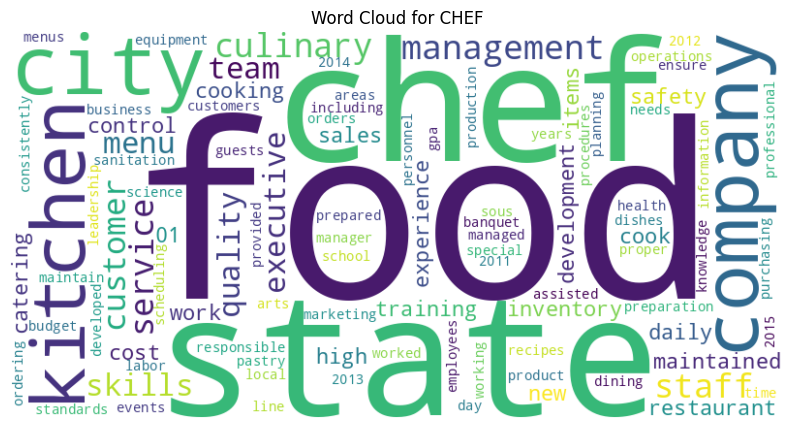

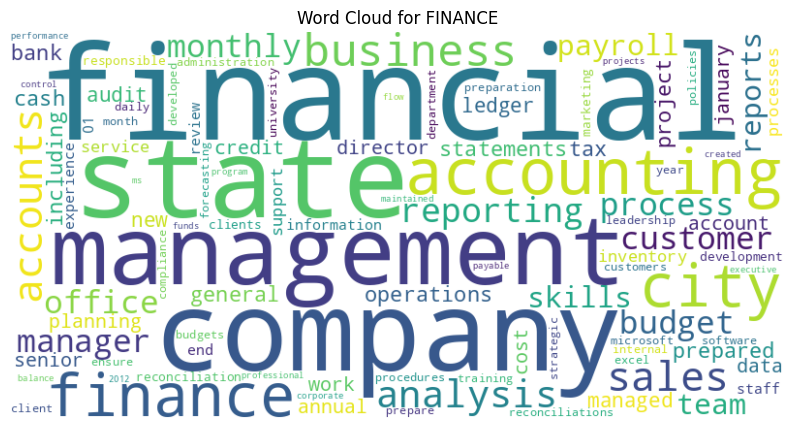

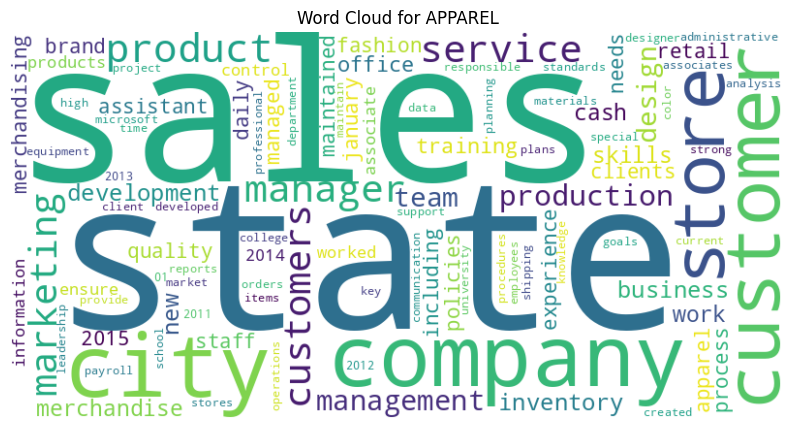

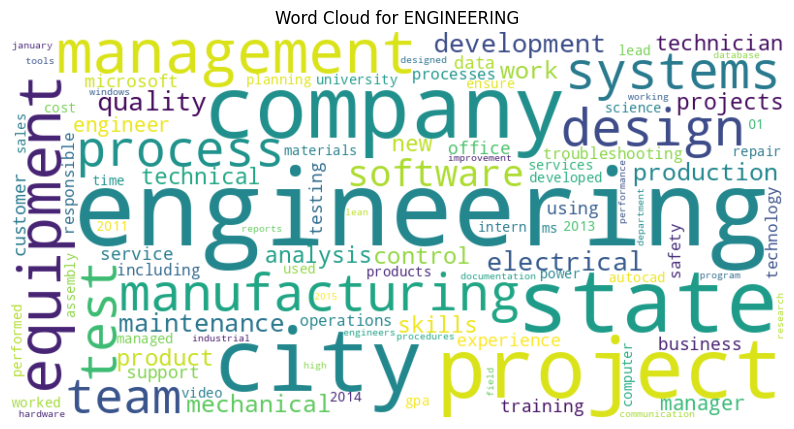

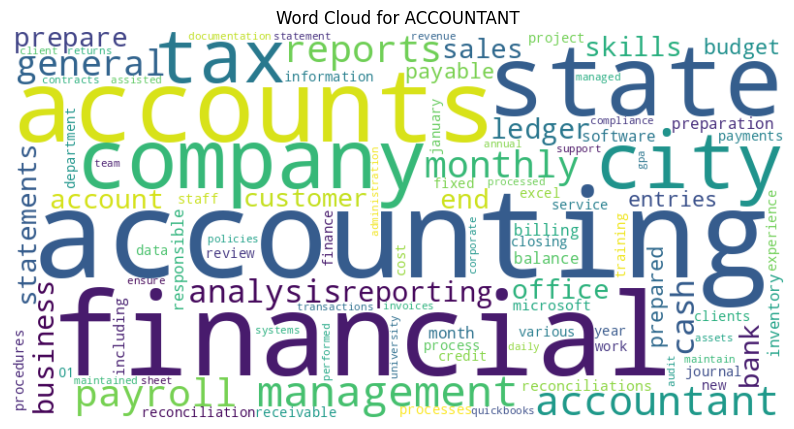

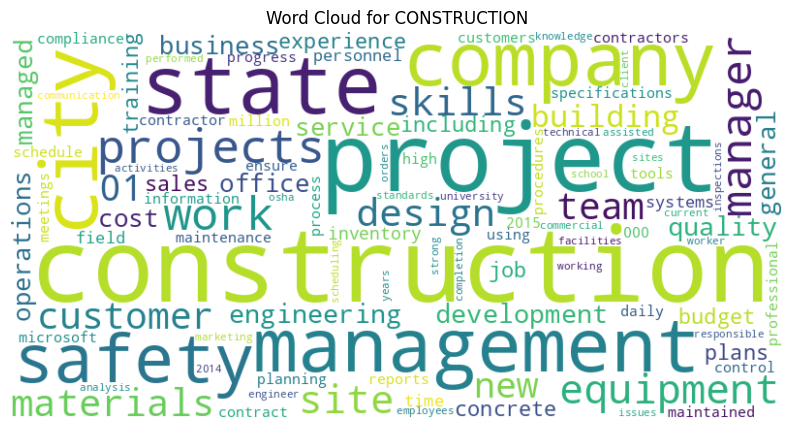

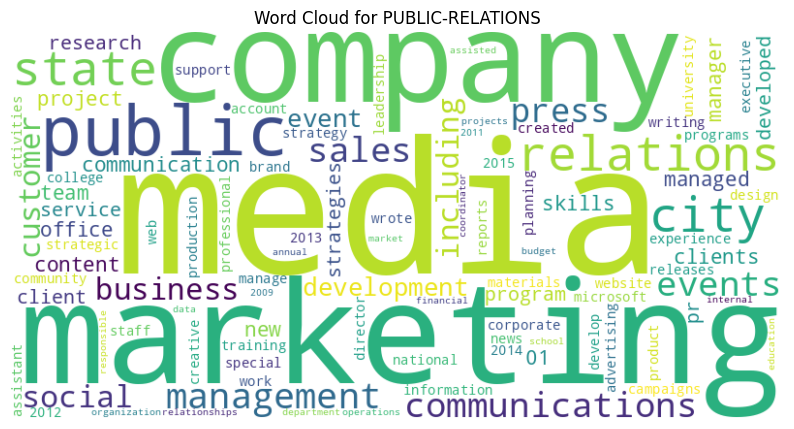

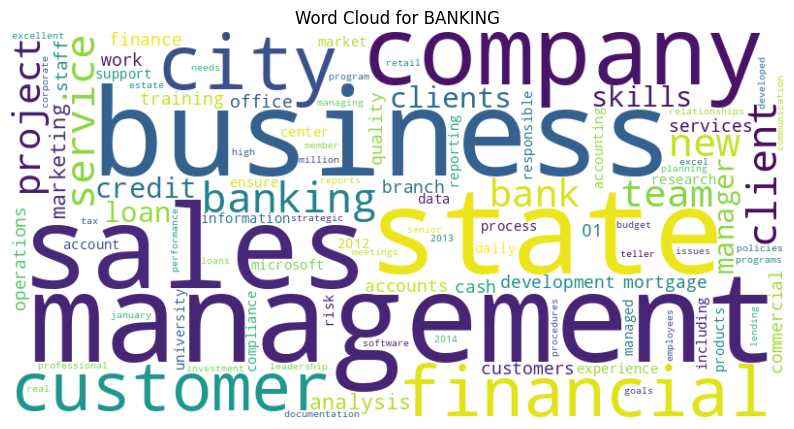

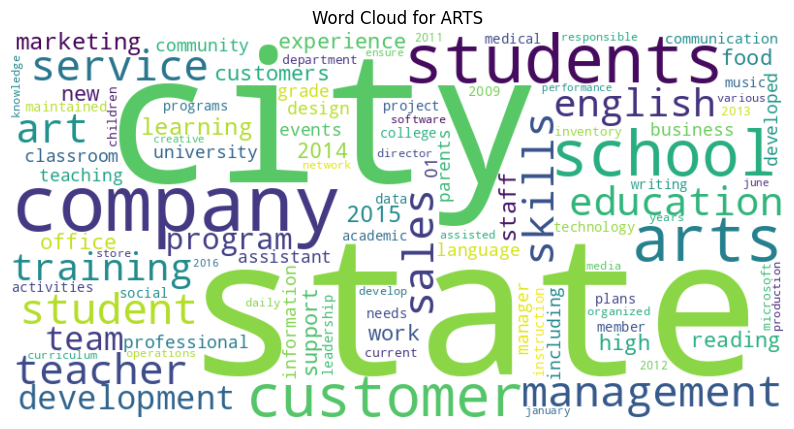

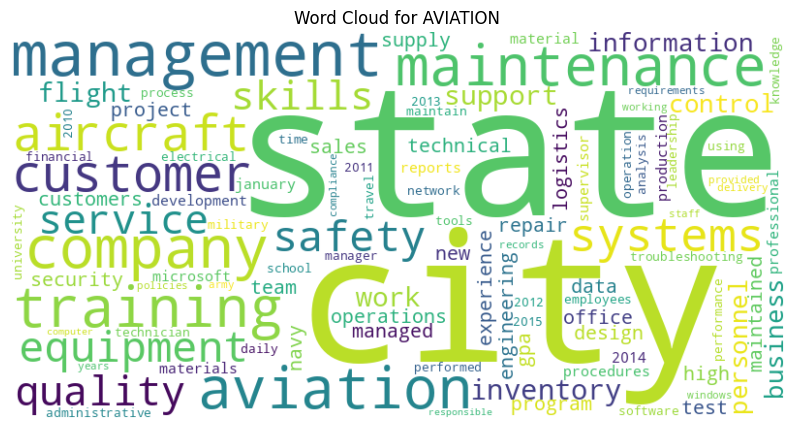

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# loading csv file
df = pd.read_csv('Resume/Resume.csv')

#  'Category' is the column containing the categories - industries
categories = df['Category'].unique()

# function defintion - to generate and save a word cloud for a given category
def generate_word_cloud(category, texts):
    tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    X_tfidf = tfidf_vectorizer.fit_transform(texts)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(
        dict(zip(feature_names, X_tfidf.sum(axis=0).A1))
    )
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')
    plt.show()  # Display the word cloud
    plt.savefig(f'word_cloud_{category}.png')
    plt.close()

# calling function
# reiterate for each
for category in categories:
    category_texts = df[df['Category'] == category]['Resume_str']
    generate_word_cloud(category, category_texts)

In [ ]:
# What I want is to be able to have people select which best fits their career or industry from a drop down menu and it could analyze from there (as a start)
# How else could I visualize this data?


